# Métodos de Runge-Kutta

In [22]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Método de Euler

In [23]:
def euler(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método de Euler começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        xx += [xn + h * func(xn, tn)]
        tt += [tn + h]
    
    return np.array(tt), np.array(xx)

## Método de Heun

In [24]:
def heun(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método de Heun começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        k1 = func(xn, tn)
        k2 = func(xn + h * k1, tn + h)
        
        xx += [xn + h * (k1 + k2) / 2]
        tt += [tn + h]
    
    return np.array(tt), np.array(xx)

## Método do Ponto Médio

In [25]:
def pmedio(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método do Ponto Médio começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]
    
        k1 = func(xn, tn)
        k2 = func(xn + h/2 * k1, tn + h/2)
        
        xx += [xn + h * k2]
        tt += [tn + h]
    
    return np.array(tt), np.array(xx)

## Método de Runge-Kutta de Terceira Ordem

In [26]:
def rk3(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método do Runge-Kutta Clássico de Ordem 3 começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]
    
        k1 = func(xn, tn)
        k2 = func(xn + h/2 * k1, tn + h/2)
        k3 = func(xn + h * (-k1 + 2 * k2), tn + h)
        
        xx += [xn + h * (k1/6 + 2 * k2/3 + k3/6)]
        tt += [tn + h]
    
    return np.array(tt), np.array(xx)

# Método de Runge-Kutta de Quarta Ordem

In [27]:
def rk4(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método de Runge-Kutta Clássico de Ordem 4 começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        k1 = func(xn, tn)
        k2 = func(xn + h/2 * k1, tn + h/2)
        k3 = func(xn + h/2 * k2, tn + h/2)
        k4 = func(xn + h * k3, tn + h)
        
        xx += [xn + h * (k1 + 2*k2 + 2*k3 + k4)/6]
        tt += [tn + h]
    
    return np.array(tt), np.array(xx)

# Método de Runge-Kutta de Ordem N

In [28]:
def rkn(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray), aRK: np.ndarray, bRK: np.ndarray, cRK: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método de Runge-Kutta de Ordem `n` começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        A matriz `aRK` é a matriz `n` por `n` de Runge-Kutta, o vetor `bRK` é o array com os `n` pesos a usar e o vetor `cRK` é o array com os `n` nodos a usar.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Número de variáveis
    nvars = 1 if len(np.array(x0).shape) == 0 else len(np.array(x0))

    # Ordem do método
    O = len(bRK)

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        # Array com os valores de k
        if nvars == 1:
            kk = np.zeros(O)
            for index in range(O):
                kk[index] = func(xn + h * (kk @ aRK[index, :]), tn + h * cRK[index])
        
            xx += [xn + h * (bRK @ kk)]
        
        else:
            kk = np.zeros((nvars, O))
            for index in range(O):
                kk[:, index] = func(xn + h * np.array([aRK[index, :] @ kk[i] for i in range(nvars)]), tn + h * cRK[index])
            
            xx += [xn + h * np.array([bRK @ kk[index] for index in range(nvars)])]
        
        tt += [tn + h]
    
    return np.array(tt), np.array(xx)

## Testar os Métodos

Vamos verificar que os métodos funcionam, considerando a seguinte equação diferencial:

$$
\frac{dx}{dt} = -0.5x \quad\quad x(0) = 1
$$

Cuja solução exata é:

$$
x(t) = e^{-0.5t}
$$

In [29]:
# Lado direito da equação
def f(x, t):
    return -0.5 * x

# Solução exata
def exato(t):
    return np.exp(-0.5 * t)


# Parâmetro
N = 4
a, b = 0, 10

# Ver também o que acontece para:
# -> N = 20 e b = 100
# -> N = 4 e b = -10


tt = np.linspace(a, b, N+1)
xx = exato(tt)

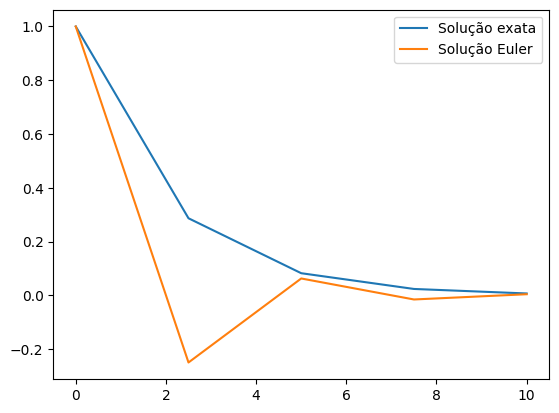

In [30]:
_, xxe = euler(a, b, f, N, 1)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xxe, label="Solução Euler")
plt.legend()
plt.show()

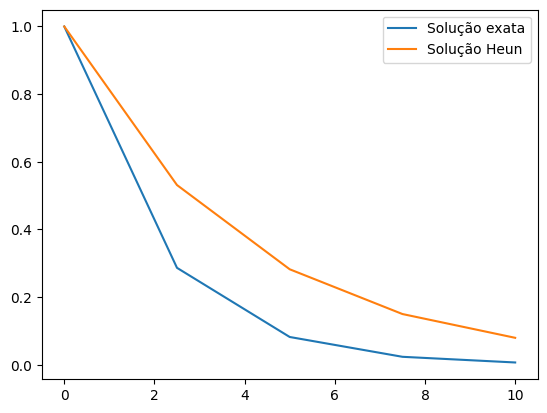

In [31]:
_, xxh = heun(a, b, f, N, 1)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xxh, label="Solução Heun")
plt.legend()
plt.show()

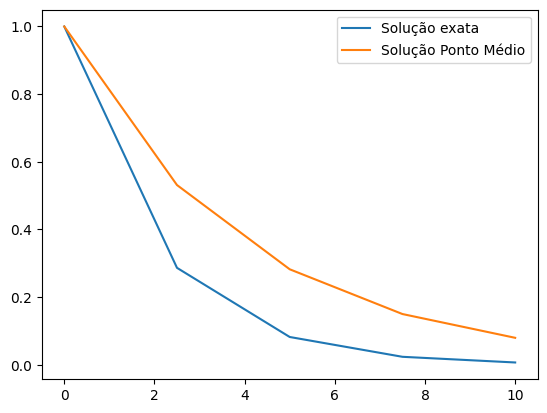

In [32]:
_, xxm = pmedio(a, b, f, N, 1)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xxm, label="Solução Ponto Médio")
plt.legend()
plt.show()

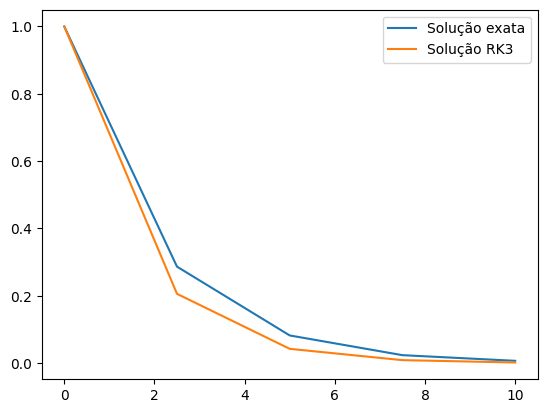

In [33]:
_, xx3 = rk3(a, b, f, N, 1)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xx3, label="Solução RK3")
plt.legend()
plt.show()

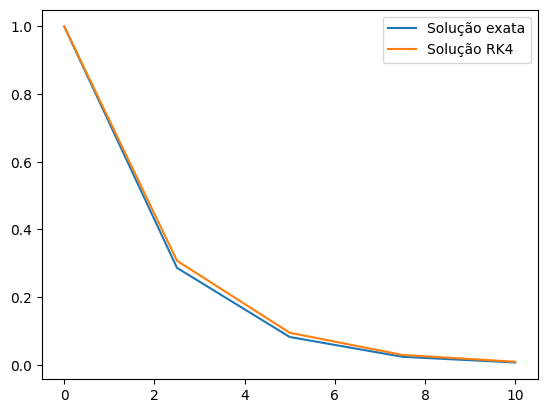

In [34]:
_, xx4 = rk4(a, b, f, N, 1)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xx4, label="Solução RK4")
plt.legend()
plt.show()

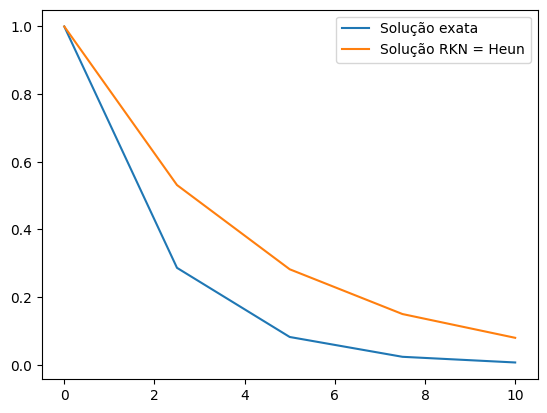

In [35]:
aHeun = np.array([
    [0, 0],
    [1, 0]
])
bHeun = np.array([
    1/2, 1/2
])
cHeun = np.array([
    0, 1
])

_, xxn = rkn(a, b, f, N, 1, aHeun, bHeun, cHeun)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xxn, label="Solução RKN = Heun")
plt.legend()
plt.show()

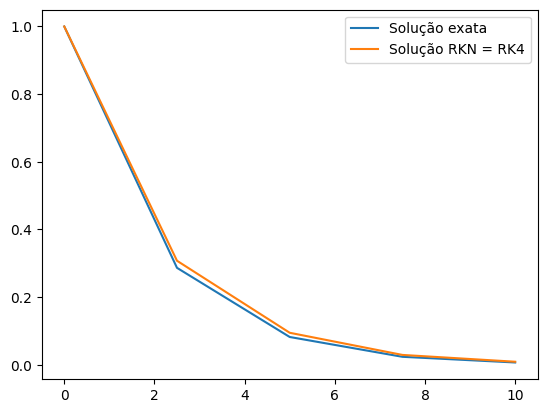

In [36]:
aRK4 = np.array([
    [0, 0, 0, 0],
    [1/2, 0, 0, 0],
    [0, 1/2, 0, 0],
    [0, 0, 1, 0]
])
bRK4 = np.array([
    1/6, 1/3, 1/3, 1/6
])
cRK4 = np.array([
    0, 1/2, 1/2, 1
])

_, xxn = rkn(a, b, f, N, 1, aRK4, bRK4, cRK4)

plt.plot(tt, xx, label="Solução exata")
plt.plot(tt, xxn, label="Solução RKN = RK4")
plt.legend()
plt.show()

# Testar para Sistemas de ODEs

Com base no exercício 2. da ficha 7

In [37]:
def f(r: np.ndarray, t: float) -> np.ndarray:
    alpha, beta, gamma, delta = 1, 0.5, 0.5, 2
    x, y = r[0], r[1]

    return np.array([alpha * x - beta * x * y, gamma * x * y - delta * y])

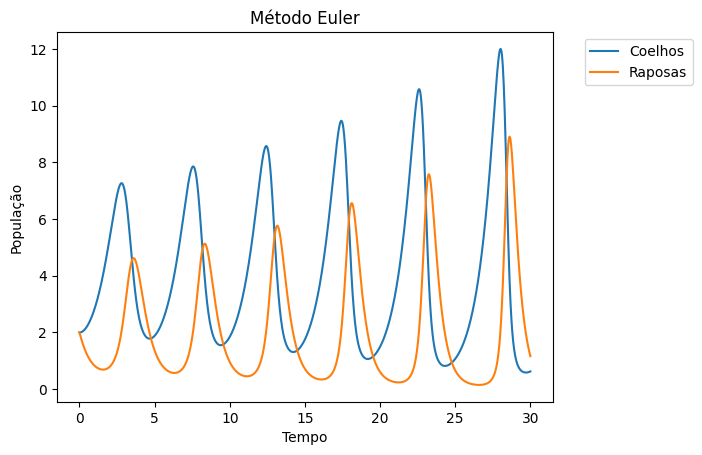

In [38]:
tt, sol = euler(0, 30, f, 1000, np.array([2, 2]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método Euler")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

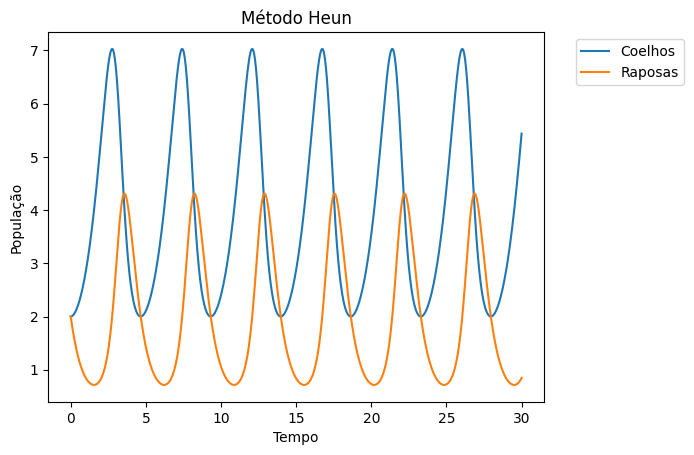

In [39]:
tt, sol = heun(0, 30, f, 1000, np.array([2, 2]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método Heun")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

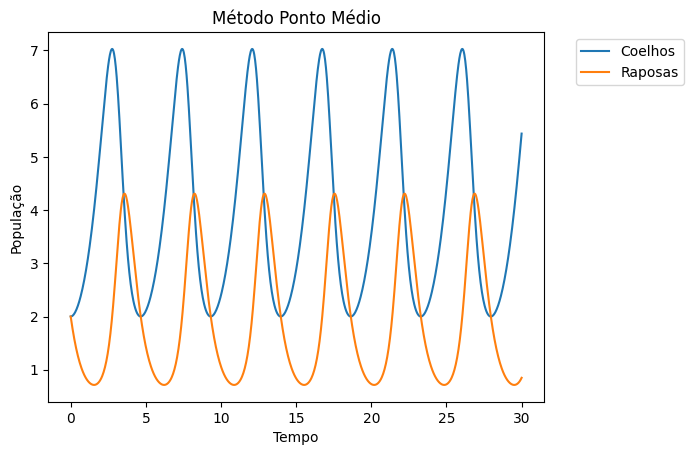

In [40]:
tt, sol = pmedio(0, 30, f, 1000, np.array([2, 2]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método Ponto Médio")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

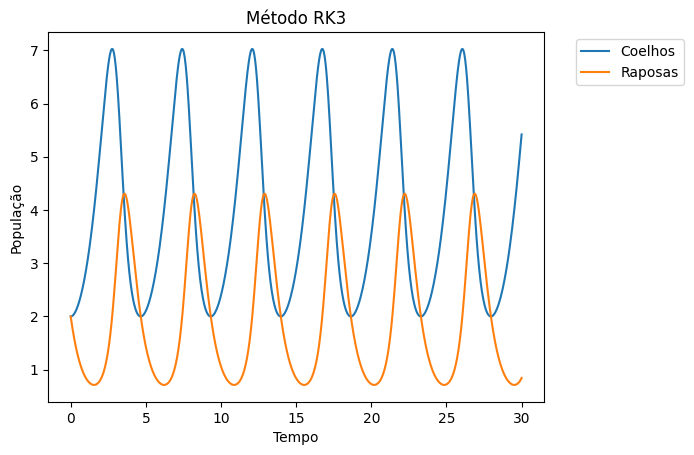

In [41]:
tt, sol = rk3(0, 30, f, 1000, np.array([2, 2]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método RK3")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

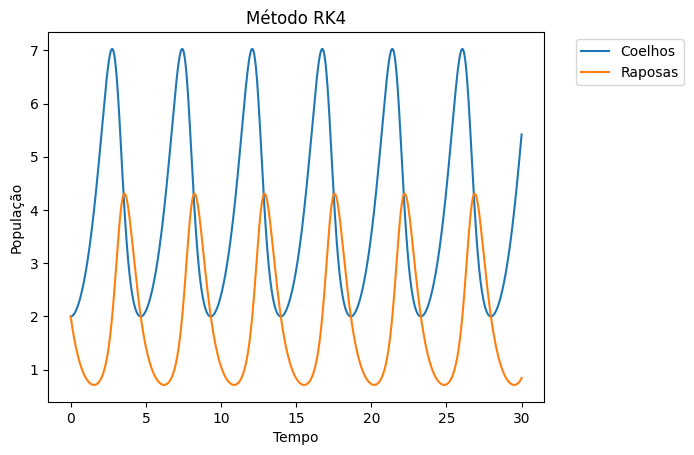

In [42]:
tt, sol = rk4(0, 30, f, 1000, np.array([2, 2]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método RK4")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

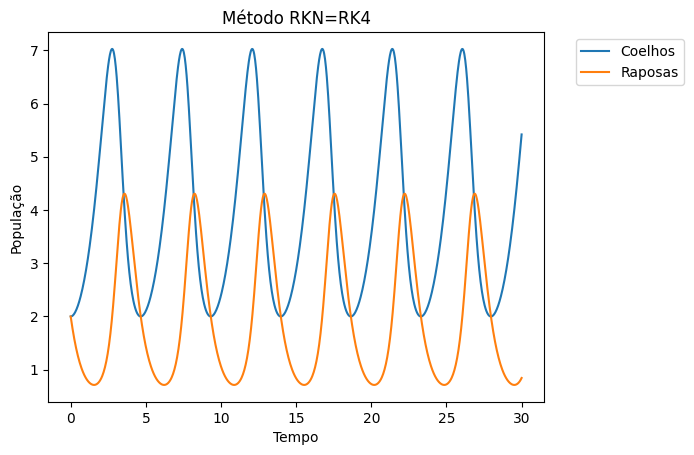

In [43]:
aRK4 = np.array([
    [0, 0, 0, 0],
    [1/2, 0, 0, 0],
    [0, 1/2, 0, 0],
    [0, 0, 1, 0]
])
bRK4 = np.array([
    1/6, 1/3, 1/3, 1/6
])
cRK4 = np.array([
    0, 1/2, 1/2, 1
])

tt, sol = rkn(0, 30, f, 1000, np.array([2, 2]), aRK4, bRK4, cRK4)
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método RKN=RK4")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()